# <span style="color:lightgreen">**Ćwiczenia 9 &#129300;**</span> 
## <span style="color:orange">**Reprezentacja wektorowa słów**</span> 

Reprezentacja tekstu BOW nie radzi sobie z relacjami semantycznymi np. z synonimią.

Powoduje to że znalezienie tekstów podobnych działa przy tej reprezetacji w bardzo ograniczonym zakresie.

Dla zadań podobieństwa (jak i wielu innych) dużo lepszym wyborem jest użycie reprezentacji przez wektorowe współzalezności



In [1]:
# Instalacja potrzebnych bibliotek (koniecznie !!!)
import matplotlib.pyplot as plt
import gensim

### <span style="color:lightblue">Word embeddings </span>

Embeddingi to wektory reprezentujące słowa w sposób, który uchwytuje ich znaczenie. 

To wielowymiarowe macierze obrazujące powiązania miedzy tokenami  poprzez ilosć wystapień. Przy użyciu takich macierzy można badać powiązania semantyczne między słowami.

W przeciwieństwie do reprezentacji one-hot, embeddingi mają mniejszą wymiarowość i mogą być trenowane na dużych korpusach tekstu, aby uchwycić znaczenie słów w kontekście.


Jak to zrobić?

np.
Używamy hipotezy dystrybucyjnej (tesguino):

liczymy ile razy słowo wystąpi w pobliżu interesującego nas słowa

(co-occurence, word-word matrix)


### <span style="color: #E0FDEF"> Wizualizacja w 2 wymiarach </span>
Każdy wiersz ma N wymiarów. Tutaj 6 wymiarów, ale chcemy zobaczyć jak to wygląda reprezentacja poprzez pozostałe wektory.

Spróbujmy zwizualizować to używająć tylko 2 wymiarów

(Wizualizacja dla większej ilości wektorów jest mało czytelna)

Zróbmy więc powierzchniową wizualizację wektorów słow
**digital** i **information**


Uruchom kod poniżej aby zobaczyć wykres obrazujący położenie wektorów dla tych dwóch słów, jeżeli są ze sobą powiązane albo nie ( =1 lub =0).



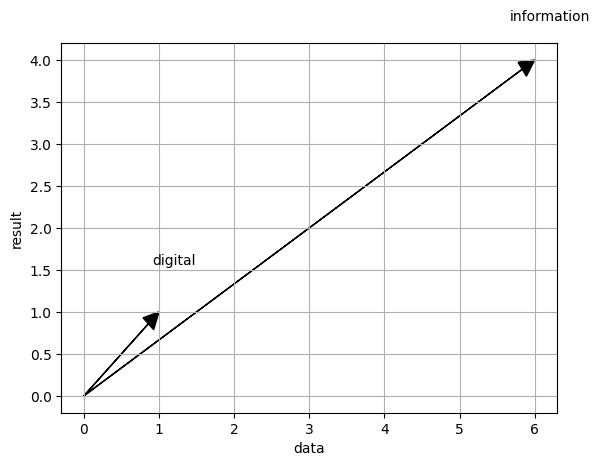

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import axes

def plot_vectors(digital_data_coocurrences = 1):
    fig, ax = plt.subplots()
    ax.set(xlim=[0,7],ylim=[0,7],autoscale_on=True,clip_on=True)
    # ax.set(frame_on=False,xticks=[],yticks=[])
    ax.arrow(0, 0, digital_data_coocurrences,1, shape='full', length_includes_head=True, head_width=0.2, head_length=0.2, fc='k', ec='k')

    ax.arrow(0, 0, 6,4, shape='full', length_includes_head=True, head_width=0.2, head_length=0.2, fc='k', ec='k')
    ax.text(digital_data_coocurrences+0.2,1.7,'digital',
            verticalalignment='top',
            horizontalalignment='center')
    ax.text(6.2,4.6,'information',
            verticalalignment='top',
            horizontalalignment='center')
    ax.set_xlabel('data')
    ax.set_ylabel('result')
    plt.grid()
    plt.show()

plot_vectors()

Dodajmy suwak żeby zobaczyc jak ilość współwystąpień zmienia zależność i jak wygląda zależność bądź jej brak

(Poniższy wykres dla **digital** i **information** pokazuje jak zmiana ilości współwystąpień wygląda na wykresie

*Można suwakiem zmieniać ilość współwystąpień tak żeby zwizualizować zależność lub jej brak*)

In [3]:
%matplotlib inline
from ipywidgets import interact, fixed
from ipywidgets import interactive

interactive_plot = interactive(plot_vectors, digital_information_coocurrences=(0,7))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=1, description='digital_data_coocurrences', max=3, min=-1), Output(layou…

## <span style="color: #F7B267"> Miary odległości i podobieństwa </span>

<span style="color: #7c7acf">**Euklidesowa** </span>


Odległość w przestrzeni euklidesowej, pierwiastek z kwadratu różnicy odpowiednich współrzędnych

Obliczamy podobieństwo euklidesowe dla słów **digital** i **information**

### <span style="color:rgb(156, 52, 179)"> Zadanie 1 </span>

Oblicz (ze współrzędnych albo funkcją euclidean) i dodaj do wykresu odległość euklidesową między  wektorami digital i information 

(zastanów się jak z tej miary wnioskować o podobieństwie słów które te wektory przedstawiają)


Zilustruj na wykresie wygląd tej odległości 

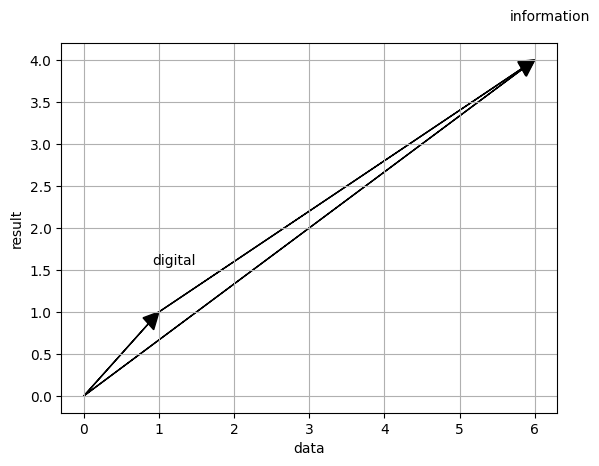

In [21]:
#miejsce na kod

def calculare_distance(x1, y1, dx1, dy1, x2, y2, dx2, dy2):
    fig, ax = plt.subplots()
    ax.set(xlim=[0, 7], ylim=[0, 7], autoscale_on=True, clip_on=True)
    
    ax.arrow(x=x1, y=y1, dx=dx1, dy=dy1, shape="full", length_includes_head=True, head_width=0.2, head_length=0.2, fc='k', ec='k')
    ax.arrow(x=x2, y=y2, dx=dx2, dy=dy2, shape="full", length_includes_head=True, head_width=0.2, head_length=0.2, fc='k', ec='k')

    ax.text(1+0.2,1.7,'digital',
            verticalalignment='top',
            horizontalalignment='center')
    ax.text(6.2,4.6,'information',
            verticalalignment='top',
            horizontalalignment='center')
    ax.set_xlabel('data')
    ax.set_ylabel('result')
    
    ax.arrow(dx1, dy1, dx2-dx1, dy2-dy1, shape="full", length_includes_head=True, head_width=0.2, head_length=0.2, fc='k', ec='k')

    plt.grid()
    plt.show()

calculare_distance(x1=0, y1=0, dx1=1, dy1=1, x2=0, y2=0, dx2=6, dy2=4)

Podobieństwo euklidesowe słabo łapie zależności między słowami, spróbujmy czegoś bardzie *"zaawansowanego"*

<span style="color:rgb(55, 191, 121)"> Podobieństwo cosinusowe </span>

Obliczaliśmy na wcześniejszych ćwiczeniach

Jest niezależne od ogólnej liczby wystąpień słowa w korpusie.

Podobieństwo cosinusowe to iloraz iloczynu współrzędnych znormalizowanego przez iloczyn długości wektorów. 

Im bliżej 1 jest wynik  tym oznacza to wyższe podobieństwo (kąt między wektorami bliski 0)

### <span style="color:rgb(212, 105, 122)">Zadanie 2 </span>


Dla wektorów o współrzednych [1,1];[6,4] można zaobserwować róznice między podobieństwami euklidesowym i cosinusowym,

Oblicz te podobieństwa używająć funkcji wbudowanych w pythona (euclidean, cosine), albo jakiś innych które to liczą. Własne funkcje też są dopuszczalne


In [23]:
#miejsce na kod
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
print(euclidean_distances([[1, 2]], [[4, 5]]))
print(cosine_distances([[1, 2]], [[4, 5]]))

[[4.24264069]]
[[0.02219759]]


Jeżeli powiększymy kontekst i zmieni się co-occurence wartość to reprezentacja cosinusowa też się zmieni.

*Dokładnie w ten sam sposób co na wykresie z suwakiem*

### <span style=color:pink> Zadanie 3 </span>
Zmień współrzędne pierwszego wektora np [6,1]


Jakie dostaniemy odległość i podobieństwo cosinusowe?

Czy interesująca jest dziwna korelacja między euklidesowym a cosinusowym podobieństwem ?

(proszę o napisanie jednozdaniowych przemyśleń na ten temat)

...



In [25]:
#miejsce na kod
print(euclidean_distances([[1, 5]], [[4, 5]]))
print(cosine_distances([[1, 5]], [[4, 5]]))

#koniecznie odpowiedz na pytanie

# podobienstwo cosinusowe bedzie miec wartosci od -1 do 1
# podobienstwo euklidesowe bedzie miec wartosci od 0 do +inf

[[3.]]
[[0.11178236]]


## <span style=color:magenta > Word2Vec </span>

### <span style=color:green> Przykład </span>

Poniżej znajduje się kod, który trenuje model Word2Vec na małym własnym korpusie. 

Model pochodzi z biblioteki gensim



In [31]:
from gensim.models import Word2Vec

# Przykładowy korpus

corpus = [
    'Ala ma kota',
    'Kot ma na imię Filemon',
    'Filemon lubi bawić się z Alą',
    'Ala i Filemon są najlepszymi przyjaciółmi'
]
# Tokenizacja korpusu
tokenized_corpus = [sentence.split() for sentence in corpus]

# Trening modelu Word2Vec
model_1 = Word2Vec(tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

# Wyświetlenie embeddingu dla słowa 'Ala'
print(model_1.wv['Ala'])

[-0.0172406   0.00733124  0.01037741  0.01148409  0.01493499 -0.01233423
  0.00221052  0.01209402 -0.00568285 -0.01234571 -0.00082209 -0.01673836
 -0.01119961  0.01420976  0.00670492  0.01445068  0.01360027  0.01506288
 -0.00757923 -0.00112503  0.00469533 -0.00903927  0.01677787 -0.0197162
  0.01353078  0.00582778 -0.00986367  0.00879818 -0.00348135  0.01342401
  0.01993236 -0.00872658 -0.00120049 -0.01139295  0.00770159  0.00557166
  0.01378205  0.01220247  0.0190766   0.01854734  0.01579569 -0.01397967
 -0.01831361 -0.00070909 -0.00619881  0.01578835  0.01187839 -0.00309181
  0.00302195  0.00357964]


### <span style=color:#bcf8f4> Zadanie 4 </span>


1. Załaduj własny korpus tekstu (3- 5 zdań), można dłuższy ale może długo trwać  &#x1F600;
2. Przeprowadx tokenizację korpusu
3. Wytrenuj model Word2Vec na swoim korpusie
4. Wyświetl embedding dla wybranego słowa z korpusu
5. Poeksperymentuj z różnymi korpusami (z powiązaniami, albo bez; w różnych językach itp.)

In [32]:
# Kod do zadania

# Załaduj własny korpus
corpus = [
    "Artificial intelligence is changing the world before our eyes.",
    "Machine learning is a key element of modern technologies.",
    "Natural language processing allows computers to understand human speech.",
    "Language models, such as GPT, are becoming increasingly advanced.",
    "Data analysis is the foundation of decision-making in business."
]

# Tokenizacja korpusu
tokenized_corpus = [sentence.split() for sentence in corpus]

# Trening modelu Word2Vec
model_2 = Word2Vec(tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

# Wyświetlenie embeddingu
print(model_2.wv['Natural'])

[ 2.87244353e-03 -5.28439460e-03 -1.41426260e-02 -1.56033784e-02
 -1.82416458e-02 -1.18778069e-02 -3.69505957e-03 -8.64134729e-03
 -1.29207419e-02 -7.44044781e-03  8.58187582e-03 -7.48187862e-03
  1.67557374e-02  3.07254749e-03 -1.44823687e-02  1.88649092e-02
  1.52631747e-02  1.09871076e-02 -1.36996927e-02  1.16402945e-02
  8.01844522e-03  1.03684366e-02  8.51473957e-03  3.87132121e-03
 -6.34034397e-03  1.67075638e-02  1.92203950e-02  7.58966291e-03
 -5.67228440e-03  1.66636455e-05  2.43986933e-03 -1.69237182e-02
 -1.64494943e-02 -4.62513766e-04  2.47600279e-03 -1.14843557e-02
 -9.44822095e-03 -1.46888066e-02  1.66608915e-02  2.48276221e-04
 -9.01876856e-03  1.14030018e-02  1.83551647e-02 -8.19552783e-03
  1.59284882e-02  1.07528437e-02  1.17610395e-02  1.02805090e-03
  1.64308213e-02 -1.40347900e-02]


## <span style=color:#d2c2a6> Wizualizacja embeddingów </span>

### <span style=color:green> Przykład </span>

Poniżej znajduje się kod, który wizualizuje embeddingi za pomocą PCA (metoda analizy składowych głównych)

Metoda ta polega on na rzutowaniu danych do przestrzeni o mniejszej liczbie wymiarów tak, aby jak najlepiej zachować strukturę danych.

W celu wyszukiwania głównych składowych zbioru korzysta się z rozkładu według wartości osobliwych (ang. singular value decomposition, SVD). Technika ta rozkłada macierz danych  na iloczyn skalarny.

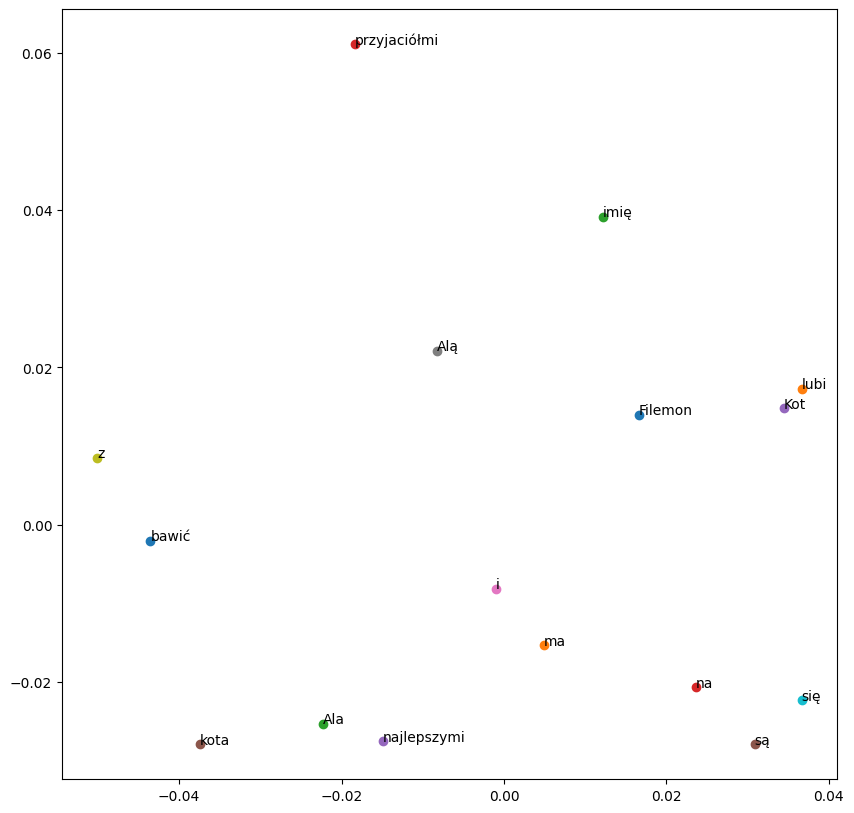

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Pobranie embeddingów dla wszystkich słów
words = list(model_1.wv.index_to_key)
embeddings = [model_1.wv[word] for word in words]

# Redukcja wymiarów za pomocą PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Wizualizacja
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word)
plt.show()

### <span style = color:#d2faa6 > Zadanie 5 </span>


1. Pobierz embeddingi dla wszystkich słów w swoim modelu
2. Zredukuj wymiary embeddingów za pomocą PCA
3. Zwizualizuj embeddingi na wykresie

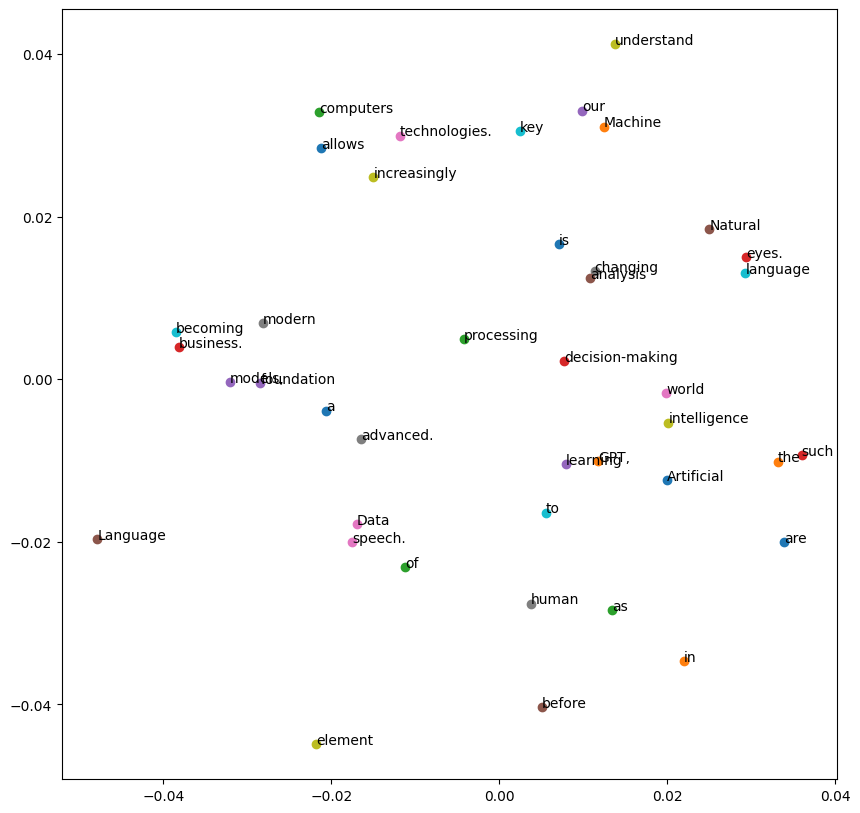

In [34]:
# Kod do zadania 

# Pobranie embeddingów
words = list(model_2.wv.index_to_key)
embeddings = [model_2.wv[word] for word in words]

# Redukcja wymiarów
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Wizualizacja
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i ,1])
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i ,1], word)
plt.show()

## <span style=color:#4cfac5>Obliczanie podobieństwa między słowami</span>


Poniżej znajduje się kod, który oblicza podobieństwo między słowami.

In [35]:
# Obliczanie podobieństwa między słowami
similarity = model_1.wv.similarity('Ala', 'Filemon')
print(f"Podobieństwo między 'Ala' a 'Filemon': {similarity}")

Podobieństwo między 'Ala' a 'Filemon': 0.12674345076084137


### <span style=color:#f045c5>   Zadanie 6 </span>


1. Wybierz dwa słowa ze swojego korpusu
2. Oblicz podobieństwo między tymi słowami za pomocą wytrenowanego modelu
3. Poeksperymentuj z różnymi zestawami (istniejące lub nieistniejące podobieństwo)

In [38]:
# Kod do zadania

# Obliczanie podobieństwa
similarity = model_2.wv.similarity('GPT,', 'computers')
print(f"Podobieństwo między 'GPT,' a 'computers': {similarity}")

Podobieństwo między 'GPT,' a 'computers': -0.1708156168460846


## <span style=color:#fa2c29> Użycie embeddingów BERT &#x1F605; </span>

Poniżej znajduje się kod, który używa modelu BERT do uzyskania embeddingów

**Uwaga:** Wymaga zainstalowania biblioteki `transformers`

In [39]:
from transformers import BertModel, BertTokenizer
import torch

# Załadowanie modelu BERT i tokenizera
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Przykładowe zdanie
sentence = "I love natural language processing"

# Tokenizacja zdania
inputs = tokenizer(sentence, return_tensors='pt')

# Uzyskanie embeddingów
with torch.no_grad():
    outputs = model(**inputs)

# Wyświetlenie embeddingu dla pierwszego tokenu
print(outputs.last_hidden_state[0][0])

tensor([-2.6363e-02,  2.2226e-01, -1.4079e-01, -3.3548e-01, -1.8787e-01,
        -1.9603e-01,  1.6970e-01,  6.4202e-01, -1.4037e-02, -2.0576e-01,
         3.5268e-03,  6.5041e-03,  1.7704e-01,  6.1987e-02,  8.5996e-02,
        -5.6878e-02, -1.1972e-01,  3.2267e-01,  1.5447e-01,  9.9170e-03,
        -6.0250e-02, -1.5259e-01, -5.3886e-02, -4.8361e-02,  2.6641e-01,
        -1.6686e-01,  6.2140e-02,  5.9272e-02,  1.8579e-01, -7.1176e-02,
         9.8758e-02,  1.3973e-01, -3.0208e-02,  2.2237e-01,  8.6604e-02,
        -2.9525e-01, -4.6717e-02, -1.9912e-01,  2.7369e-02,  5.0748e-02,
         5.7589e-02, -2.1401e-02,  3.1253e-02, -5.7378e-02, -7.9598e-02,
        -1.7185e-01, -2.1352e+00, -1.6253e-02, -1.2348e-01, -1.7450e-01,
         1.2703e-01,  2.4226e-01,  3.1393e-01,  2.4452e-01,  1.3681e-01,
         1.8583e-01, -2.7304e-01,  5.6246e-01, -1.4762e-02,  8.5878e-02,
         2.7613e-01,  1.5426e-01, -9.3018e-02,  1.1838e-01, -7.8990e-02,
        -1.0940e-01, -2.1563e-01,  7.0942e-02, -5.0

### <span style=color:#2897d4>  Zadanie 7 (dodatkowe punkty) </span>

1. Załaduj model BERT i tokenizer
2. Tokenizuj własne zdanie
3. Uzyskaj embeddingi dla tokenów w zdaniu

In [42]:
# Kod do zadania

# Załaduj model BERT i tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

sentence = "Data is new oil of nowadays economy"

# Tokenizacja zdania
inputs = tokenizer(sentence, return_tensors='pt')

# Uzyskanie embeddingów
with torch.no_grad():
    output = model(**inputs)

print(outputs.last_hidden_state[0][0])

tensor([-2.6363e-02,  2.2226e-01, -1.4079e-01, -3.3548e-01, -1.8787e-01,
        -1.9603e-01,  1.6970e-01,  6.4202e-01, -1.4037e-02, -2.0576e-01,
         3.5268e-03,  6.5041e-03,  1.7704e-01,  6.1987e-02,  8.5996e-02,
        -5.6878e-02, -1.1972e-01,  3.2267e-01,  1.5447e-01,  9.9170e-03,
        -6.0250e-02, -1.5259e-01, -5.3886e-02, -4.8361e-02,  2.6641e-01,
        -1.6686e-01,  6.2140e-02,  5.9272e-02,  1.8579e-01, -7.1176e-02,
         9.8758e-02,  1.3973e-01, -3.0208e-02,  2.2237e-01,  8.6604e-02,
        -2.9525e-01, -4.6717e-02, -1.9912e-01,  2.7369e-02,  5.0748e-02,
         5.7589e-02, -2.1401e-02,  3.1253e-02, -5.7378e-02, -7.9598e-02,
        -1.7185e-01, -2.1352e+00, -1.6253e-02, -1.2348e-01, -1.7450e-01,
         1.2703e-01,  2.4226e-01,  3.1393e-01,  2.4452e-01,  1.3681e-01,
         1.8583e-01, -2.7304e-01,  5.6246e-01, -1.4762e-02,  8.5878e-02,
         2.7613e-01,  1.5426e-01, -9.3018e-02,  1.1838e-01, -7.8990e-02,
        -1.0940e-01, -2.1563e-01,  7.0942e-02, -5.0